Número estimado de clusters: 5
Número estimado de pontos de ruído: 85


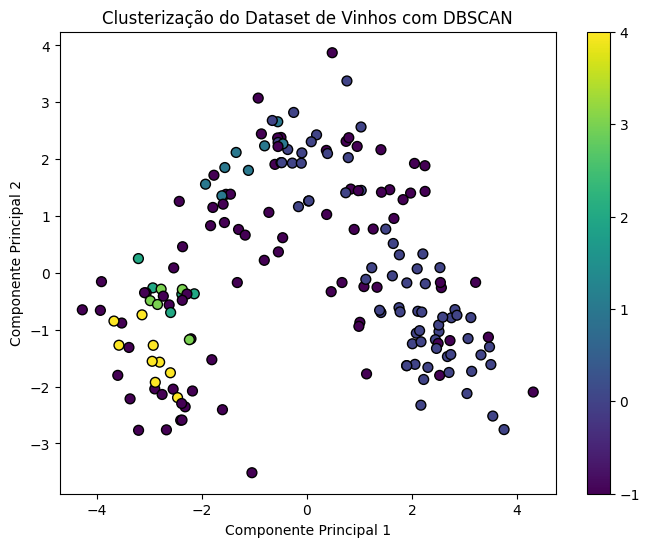

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Carregando o dataset
data = load_wine()
X = data.data
y = data.target

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Aplicando o DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # eps e min_samples podem ser ajustados conforme necessário
dbscan.fit(X_scaled)
labels = dbscan.labels_

# Lidando com ruídos identificados pelo DBSCAN
# Pontos com rótulo -1 são considerados ruídos (outliers)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número estimado de clusters: %d' % n_clusters_)
print('Número estimado de pontos de ruído: %d' % n_noise_)

# Reduzindo a dimensionalidade para visualização com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotando os resultados do clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusterização do Dataset de Vinhos com DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.show()